In [1]:
import networkx as nx
from pathlib import Path
import os
import json
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import itertools

In [42]:
hedonometer = pd.read_csv('Hedonometer.csv')
hedonometer

Rank       Word Word in English  Happiness Score  \
0          0   laughter        laughter             8.50   
1          1  happiness       happiness             8.44   
2          2       love            love             8.42   
3          3      happy           happy             8.30   
4          4    laughed         laughed             8.26   
...      ...        ...             ...              ...   
10217  10217     murder          murder             1.48   
10218  10218  terrorism       terrorism             1.48   
10219  10219       rape            rape             1.44   
10220  10220    suicide         suicide             1.30   
10221  10221  terrorist       terrorist             1.30   

       Standard Deviation of Ratings  
0                             0.9313  
1                             0.9723  
2                             1.1082  
3                             0.9949  
4                             1.1572  
...                              ...  
10217                         1.0150  
10218                         0.9089  
10219                         0.7866  
10220                         0.8391  
10221                         0.9091  

[10222 rows x 5 columns]

In [43]:
X = hedonometer['Word in English']
y = hedonometer['Happiness Score']

In [46]:
os.listdir('trope_list/tropes')

['OutscareTheEnemy.html',
 'CriticBreakdown.html',
 'ConsequenceCombo.html',
 'AbsurdlyLowLevelCap.html',
 'PerspectiveMagic.html',
 'AmericanRobot.html',
 'FullNameBasis.html',
 'MasqueradeBall.html',
 'SpecialOddHand.html',
 'TheBeastmaster.html',
 'JustTestingYou.html',
 'PrivilegedRival.html',
 'JustFineWithoutYou.html',
 'DebugRoom.html',
 'WeightLossHorror.html',
 'NoTalkingOrPhonesWarning.html',
 'HereThereWereDragons.html',
 'HotPotato.html',
 'VileVillainLaughableLackey.html',
 'AdultFear.html',
 'EvilCannotComprehendGood.html',
 'AdjacentToThisCompleteBreakfast.html',
 'TheCommissionerGordon.html',
 'FamilyFriendlyStripper.html',
 'ChewbaccaDefense.html',
 'ForgettableCharacter.html',
 'FolkPunk.html',
 'CryingARiver.html',
 'ThereAreNoRules.html',
 'LastNoteHilarity.html',
 'CombinatorialExplosion.html',
 'RemoteYetVulnerable.html',
 'SurrealSymbolicHeads.html',
 'FirehouseDalmatian.html',
 'SailorsPonytail.html',
 'AnsweringEcho.html',
 'QuicklyDemotedWoman.html',
 'Invisib

In [267]:
import re

name = 'ApplesGoHome.html'
splitted = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', name)).split()
splitted

['Apples', 'Go', 'Home.html']

In [268]:
def splitter(s):
    splitted = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', s)).split()
    return splitted

In [269]:
trope_list = [s.split(".")[0] for s in os.listdir('trope_list/tropes')]

In [270]:
tokenized_list = {s: {'all tokens':splitter(s)} for s in trope_list}
hedo_words = list(hedonometer['Word in English'])

In [271]:
for k, v in tokenized_list.items():
    score = 0
    tokenized_list[k]['in hedo'] = []
    tokenized_list[k]['scores'] = []
    tokenized_list[k]['not in hedo'] = []
    tokenized_list[k]['category'] = None
    for token in tokenized_list[k]['all tokens']:
        lower_token = token.lower()
        if lower_token in hedo_words:
            tokenized_list[k]['in hedo'].append(lower_token)
            token_score = hedonometer.loc[hedonometer['Word in English'] == lower_token]['Happiness Score'].values[0]
            tokenized_list[k]['scores'].append(token_score)
        else:
            tokenized_list[k]['not in hedo'].append(lower_token)
            
    tokenized_list[k]['all_ind'] = []
    
    for index, links in index_list.items():
        if k in links:
            tokenized_list[k]['all_ind'].append(index)
            
    tokenized_list[k]['Big4'] = []
    
    for big4, subind in main_4.items():
        for trope_list in subind.values():
            if k in trope_list:
                tokenized_list[k]['Big4'].append(big4)
                break
    if len(tokenized_list[k]['scores']) > 0:
        tokenized_list[k]['mean happiness'] = round(np.array(tokenized_list[k]['scores']).mean(),2)
    
    if len(tokenized_list[k]['Big4']) == 1:
        tokenized_list[k]['category'] = tokenized_list[k]['Big4'][0]

In [191]:
main_4 = json.load(open('main4_subindices_dict.json'))

In [275]:
with open("happiness_all_tropes.json", "w") as f:
    json.dump(tokenized_list, f)
    f.close()

In [304]:
token_df = pd.DataFrame(tokenized_list).transpose()
token_df['mean happiness'] = token_df['mean happiness'].astype(float)

In [305]:
token_df.groupby('category').size()

category
GenreTropes        1169
MediaTropes        1233
NarrativeTropes    1409
TopicalTropes      7628
dtype: int64

In [308]:
happy_per_big4 = token_df.groupby('category').agg({'mean happiness':['mean','std', 'count']})

In [315]:
happy_per_big4['mean happiness']

mean       std  count
category                                  
GenreTropes      5.332048  0.990396   1035
MediaTropes      5.681742  0.920808   1079
NarrativeTropes  5.444318  0.918147   1253
TopicalTropes    5.381014  1.040484   6804

In [319]:
happy_per_big4['mean happiness'].to_csv("happy_per_big4.csv")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f82e58a13d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f82f7879110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f82e596ae10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f82f7cf4610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f82f7cf48d0>],
 'means': []}

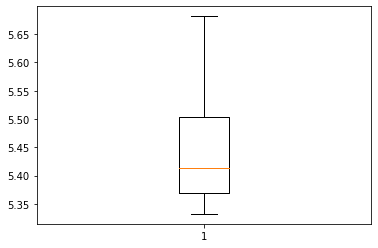

In [318]:
plt.boxplot(happy_per_big4['mean happiness']['mean'])

In [233]:
token_df.loc[token_df['mean happiness'] == min(token_df['mean happiness'])]

all tokens      in hedo scores  \
PsychicAssistedSuicide  [Psychic, Assisted, Suicide]    [suicide]  [1.3]   
EcoTerrorist                        [Eco, Terrorist]  [terrorist]  [1.3]   
HeroicSuicide                      [Heroic, Suicide]    [suicide]  [1.3]   
SuicidePact                          [Suicide, Pact]    [suicide]  [1.3]   
BarefootSuicide                  [Barefoot, Suicide]    [suicide]  [1.3]   
BungledSuicide                    [Bungled, Suicide]    [suicide]  [1.3]   
InterruptedSuicide            [Interrupted, Suicide]    [suicide]  [1.3]   
SpitefulSuicide                  [Spiteful, Suicide]    [suicide]  [1.3]   

                                not in hedo  \
PsychicAssistedSuicide  [psychic, assisted]   
EcoTerrorist                          [eco]   
HeroicSuicide                      [heroic]   
SuicidePact                          [pact]   
BarefootSuicide                  [barefoot]   
BungledSuicide                    [bungled]   
InterruptedSuicide            [interrupted]   
SpitefulSuicide                  [spiteful]   

                                                                  all_ind  \
PsychicAssistedSuicide  [AReluctantIndex, AllLovingHero, ChoosingDeath...   
EcoTerrorist            [Criminals, CynicismTropes, TheOnlyRighteousIn...   
HeroicSuicide           [ChoosingDeath, DiesDifferentlyInAdaptation, D...   
SuicidePact             [ApocalypticLog, Authors, CardCarryingVillain,...   
BarefootSuicide         [ChoosingDeath, DeathTropes, DrivenToSuicide, ...   
BungledSuicide          [ChoosingDeath, DeathTropes, DeconstructedChar...   
InterruptedSuicide      [BrokenAce, BungledSuicide, CharactersAsDevice...   
SpitefulSuicide         [BetterToDieThanBeKilled, ChoosingDeath, Death...   

                                                    Big4 mean happiness  
PsychicAssistedSuicide                   [TopicalTropes]            1.3  
EcoTerrorist            [NarrativeTropes, TopicalTropes]            1.3  
HeroicSuicide                                         []            1.3  
SuicidePact                              [TopicalTropes]            1.3  
BarefootSuicide                          [TopicalTropes]            1.3  
BungledSuicide                           [TopicalTropes]            1.3  
InterruptedSuicide      [NarrativeTropes, TopicalTropes]            1.3  
SpitefulSuicide                          [TopicalTropes]            1.3

In [276]:
token_df.to_csv("happiness_all_tropes.csv")

In [263]:
token_df_ind = token_df.reset_index()
token_df_ind['Big4'].values == 1

array([False, False, False, ..., False, False, False])

In [248]:
for i in token_df['Big4']:
    if len(i) == 1:
        token_df.loc[token_df['Big4'] == len(i)]
    #print(len(i))
#token_df['single big4'] = 

Empty DataFrame
Columns: [all tokens, in hedo, scores, not in hedo, all_ind, Big4, mean happiness]
Index: []
Empty DataFrame
Columns: [all tokens, in hedo, scores, not in hedo, all_ind, Big4, mean happiness]
Index: []
Empty DataFrame
Columns: [all tokens, in hedo, scores, not in hedo, all_ind, Big4, mean happiness]
Index: []
Empty DataFrame
Columns: [all tokens, in hedo, scores, not in hedo, all_ind, Big4, mean happiness]
Index: []
Empty DataFrame
Columns: [all tokens, in hedo, scores, not in hedo, all_ind, Big4, mean happiness]
Index: []
Empty DataFrame
Columns: [all tokens, in hedo, scores, not in hedo, all_ind, Big4, mean happiness]
Index: []
Empty DataFrame
Columns: [all tokens, in hedo, scores, not in hedo, all_ind, Big4, mean happiness]
Index: []
Empty DataFrame
Columns: [all tokens, in hedo, scores, not in hedo, all_ind, Big4, mean happiness]
Index: []
Empty DataFrame
Columns: [all tokens, in hedo, scores, not in hedo, all_ind, Big4, mean happiness]
Index: []
Empty DataFrame
Col

In [179]:
index_list = json.load(open('index-list/index-list.json'))

In [180]:
for k,v in index_list.items():
    print(k,v)

The50GreatestCartoons ['TheCatCameBack', 'HairRaisingHare', 'ScrewballSquirrel', 'LoadsAndLoadsOfCharacters']
ABouncySpringyIndex ['BouncingBattler', 'CobwebTrampoline', 'Gainaxing', 'GelatinousTrampoline', 'GoombaSpringboard', 'GoombaStomp', 'HyperDestructiveBouncingBall', 'JigglePhysics', 'RubberMan', 'RubberyWorld', 'SolidClouds', 'SpringCoil', 'SpringsSpringsEverywhere', 'SpringySpores', 'TrampolineTummy', 'TremorTrampoline', 'WackyWaterbed']
ACommanderIsYou ['GameBreaker', 'CripplingOverspecialization', 'AnAdventurerIsYou', 'WeHaveReserves', 'EliteArmy', 'OneManArmy', 'JackOfAllStats', 'HumansAreAverage', 'JackOfAllTrades', 'MasterOfNone', 'TheComputerIsACheatingBastard', 'ArtificialStupidity', 'SquishyWizard', 'TechTree', 'MagikarpPower', 'LinearWarriorsQuadraticWizards', 'FragileSpeedster', 'GlassCannon', 'HitAndRunTactics', 'CripplingOverspecialization', 'MasterOfNone', 'TacticalRockPaperScissors', 'QuirkyBard', 'LethalJokeCharacter', 'TurnBasedStrategy', 'TechTree', 'SelfImpos

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
hedonometer.loc[hedonometer['Word in English'] == "lick"]

In [324]:

not_in_hedo = {k:v['not in hedo'] for k, v in tokenized_list.items() if (len(v['not in hedo']) != 0)}

In [328]:
with open("tokens_not_in_hedonometer.json", "w") as f:
    json.dump(not_in_hedo, f)
    f.close()

In [327]:
not_in_hedo

{'OutscareTheEnemy': ['outscare'],
 'AbsurdlyLowLevelCap': ['absurdly'],
 'MasqueradeBall': ['masquerade'],
 'TheBeastmaster': ['beastmaster'],
 'PrivilegedRival': ['privileged'],
 'DebugRoom': ['debug'],
 'HereThereWereDragons': ['dragons'],
 'VileVillainLaughableLackey': ['vile', 'villain', 'laughable', 'lackey'],
 'FamilyFriendlyStripper': ['stripper'],
 'ChewbaccaDefense': ['chewbacca'],
 'ForgettableCharacter': ['forgettable'],
 'LastNoteHilarity': ['hilarity'],
 'CombinatorialExplosion': ['combinatorial'],
 'SurrealSymbolicHeads': ['surreal'],
 'FirehouseDalmatian': ['firehouse', 'dalmatian'],
 'SailorsPonytail': ['sailors', 'ponytail'],
 'AnsweringEcho': ['answering'],
 'QuicklyDemotedWoman': ['demoted'],
 'FictionalFieldOfScience': ['fictional'],
 'TheProtagonist': ['protagonist'],
 'ReincarnateInAnotherWorld': ['reincarnate'],
 'ParentWithNewParamour': ['paramour'],
 'SelfProclaimedKnight': ['proclaimed'],
 'HealingVat': ['vat'],
 'BusFullOfInnocents': ['innocents'],
 'Previou

In [333]:
print(pd.read_csv("happiness_anova.csv").to_latex())

\begin{tabular}{llrrrrr}
\toprule
{} &       term &     df &         sumsq &     meansq &  statistic &       p.value \\
\midrule
0 &   category &      3 &     92.824685 &  30.941562 &  30.398397 &  1.479808e-19 \\
1 &  Residuals &  10167 &  10348.665926 &   1.017868 &        NaN &           NaN \\
\bottomrule
\end{tabular}



In [334]:
print(pd.read_csv("happiness_tukey.csv").to_latex())

\begin{tabular}{lllrrrrr}
\toprule
{} &      term &                       contrast &  null.value &  estimate &  conf.low &  conf.high &   adj.p.value \\
\midrule
0 &  category &        MediaTropes-GenreTropes &           0 &  0.349694 &  0.236907 &   0.462481 &  0.000000e+00 \\
1 &  category &    NarrativeTropes-GenreTropes &           0 &  0.112269 &  0.003384 &   0.221155 &  4.030822e-02 \\
2 &  category &      TopicalTropes-GenreTropes &           0 &  0.048966 & -0.037524 &   0.135456 &  4.652118e-01 \\
3 &  category &    NarrativeTropes-MediaTropes &           0 & -0.237425 & -0.345087 &  -0.129762 &  8.943662e-08 \\
4 &  category &      TopicalTropes-MediaTropes &           0 & -0.300728 & -0.385674 &  -0.215783 &  0.000000e+00 \\
5 &  category &  TopicalTropes-NarrativeTropes &           0 & -0.063304 & -0.142996 &   0.016389 &  1.730504e-01 \\
\bottomrule
\end{tabular}



In [335]:
print(pd.read_csv("happiness_mean_table.csv").to_latex())

\begin{tabular}{llrrr}
\toprule
{} &         category &      mean &       std &  count \\
\midrule
0 &      GenreTropes &  5.332048 &  0.990396 &   1035 \\
1 &      MediaTropes &  5.681742 &  0.920808 &   1079 \\
2 &  NarrativeTropes &  5.444318 &  0.918147 &   1253 \\
3 &    TopicalTropes &  5.381014 &  1.040484 &   6804 \\
\bottomrule
\end{tabular}

